In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import bias_variance_decomp


In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = df['Level'].values
print(type(x)) ## convert series into nump array
y = df['Salary'].values
print(type(y))
x.shape,y.shape
x = np.expand_dims(x,axis=1) # changing dimension for model.fit()
x.shape


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(10, 1)

In [4]:
#splitting data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
def bias_varience(model,x_train,y_train,x_test,y_test):
    mse,bias,varience =bias_variance_decomp(model,x_train,y_train,x_test,y_test,loss = 'mse',num_rounds=200,random_seed = 43)
    return mse,bias,varience

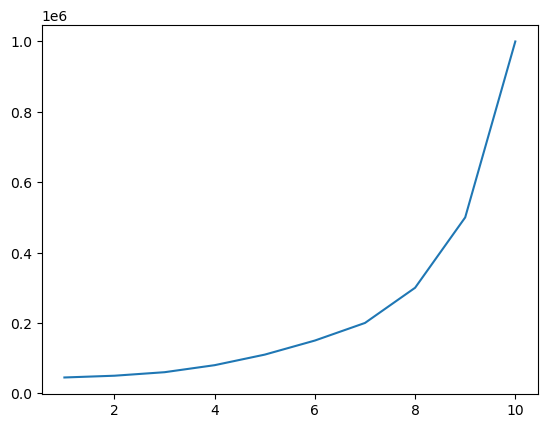

In [6]:
plt.plot(x,y)

In [7]:
linear = LinearRegression()
linear.fit(x,y)
mse_linear,bias_linear,varience_linear =bias_varience(linear,x_train,y_train,x_test,y_test)




In [8]:
def polynomial_regression(degr):
    poly_features = PolynomialFeatures(degree=degr)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)
    poly_model = LinearRegression()
    poly_model.fit(x_train_poly,y_train)
    mse_poly,bias_poly,variance_poly =bias_varience(poly_model,x_train_poly,y_train,x_test_poly,y_test)
    return mse_poly,bias_poly,variance_poly

In [9]:
mse_2,bias_2,varience_2 = polynomial_regression(2)
mse_5,bias_5,varience_5 = polynomial_regression(5)
mse_11,bias_11,varience_11= polynomial_regression(11)

In [10]:
data={
    'MSE':[mse_linear,mse_2,mse_5,mse_11],
    'BIAS':[bias_linear,bias_2,bias_5,bias_11],
    'VARIANCE':[varience_linear,varience_2,varience_5,varience_11]
}
df=pd.DataFrame(data,index=["degree_1","Degree_2","Degree_5","Degree_11"])
df

,MSE,BIAS,VARIANCE
degree_1,3.724787e+10,8.670133e+09,2.857774e+10
Degree_2,3.073654e+10,3.944648e+09,2.679190e+10
Degree_5,4.734754e+09,1.185439e+07,4.722899e+09
Degree_11,3.801882e+16,3.576920e+10,3.801878e+16
